a)

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

Xa =np.array([[0,1],[1,0]])
Ya =np.array([[0,0-1.j],[0+1.j,0]])
Za =np.array([[1,0],[0,-1]])

Xb =np.array([[0,1,0],[1,0,1],[0,1,0]])
Yb =np.array([[0,-1.j,0],[0+1.j,0,-1.j],[0,1.j,0]])
Zb =np.array([[1,0,0],[0,0,0],[0,0,-1]])

XaF=np.kron(Xa,np.identity(3, dtype = complex))
XbF=np.kron(np.identity(2, dtype = complex),Xb)

YaF=np.kron(Ya,np.identity(3, dtype = complex))
YbF=np.kron(np.identity(2, dtype = complex),Yb)

ZaF=np.kron(Za,np.identity(3, dtype = complex))
ZbF=np.kron(np.identity(2, dtype = complex),Zb)

h=random.random()

## A -> Spin-1/2 Particle
A=np.zeros((2,1),dtype=complex)
A[0][0]=random.random()+random.random()*1.j
A[1][0]=random.random()+random.random()*1.j
hA=np.conj(A).T
norA=(np.dot(hA,A))**0.5
A=A/norA
hA=hA/norA



##  B -> Spin-1 Particle 

B=np.zeros((3,1),dtype=complex)
B[0][0]=random.random()+random.random()*1.j
B[1][0]=random.random()+random.random()*1.j
B[2][0]=random.random()+random.random()*1.j
hB=np.conj(B).T
norB=(np.dot(hB,B))**0.5
B=B/norB
hB=hB/norB


Ham=np.dot(XaF,XbF)+np.dot(YaF,YbF)+np.dot(ZaF,ZbF)+(h*ZaF)+ZbF


print('A:',A)
print('B:',B)
print('Hamiltonian:',Ham)

A: [[0.85999954+0.44432504j]
 [0.21553311+0.12853612j]]
B: [[0.05349766+0.55079955j]
 [0.54367543+0.44060462j]
 [0.30348172+0.33457631j]]
Hamiltonian: [[ 2.41615941+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.41615941+0.j  0.        +0.j  2.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -1.58384059+0.j  0.        +0.j
   2.        +0.j  0.        +0.j]
 [ 0.        +0.j  2.        +0.j  0.        +0.j -0.41615941+0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  2.        +0.j  0.        +0.j
  -0.41615941+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j -0.41615941+0.j]]


In [3]:
AB=np.kron(A,B)
print('Full system:',AB)
hAB=np.conj(AB).T
print('hAB:',hAB)



Full system: [[-0.19872607+0.49745771j]
 [ 0.27178895+0.62048838j]
 [ 0.11233351+0.42258j   ]
 [-0.05926712+0.12559192j]
 [ 0.06054645+0.16484681j]
 [ 0.02240522+0.11112063j]]
hAB: [[-0.19872607-0.49745771j  0.27178895-0.62048838j  0.11233351-0.42258j
  -0.05926712-0.12559192j  0.06054645-0.16484681j  0.02240522-0.11112063j]]


In [4]:
## Using Individual Matrices and Vectors

In [5]:
## For A

ExpZa=np.dot(hA,np.dot(Za,A))
print('Expectation value of z for A is:',ExpZa[0])

Expectation value of z for A is: [0.87404789+0.j]


In [6]:
## For B

ExpZb=np.dot(hB,np.dot(Zb,B))
print('Expectation value of z for B is:',ExpZb[0])

Expectation value of z for B is: [0.10219968+0.j]


In [7]:
## Using Full System Vectors and Matrices


In [8]:
## For A

ExpZaF=np.dot(hAB,np.dot(ZaF,AB))
print('Expectation value of z for A is:',ExpZaF[0])

Expectation value of z for A is: [0.87404789+0.j]


In [9]:
## For B

ExpZbF=np.dot(hAB,np.dot(ZbF,AB))
print('Expectation value of z for B is:',ExpZbF[0])

Expectation value of z for B is: [0.10219968+0.j]


b)

In [10]:
EAl=list()
EBl=list()
hl=list()
for h in np.arange(1,10,0.1):
    
    Ham=np.dot(XaF,XbF)+np.dot(YaF,YbF)+np.dot(ZaF,ZbF)+(h*ZaF)+ZbF
    v,w=np.linalg.eigh(Ham)
    GS=w[:,0]
    hGS=np.conj(GS).T
    
    EA=np.dot(hGS,np.dot(ZaF,GS))
    EAl.append(EA)
    
    EB=np.dot(hGS,np.dot(ZbF,GS))
    EBl.append(EB)
    
    hl.append(h)


C:\Users\Kartikeya Arora\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


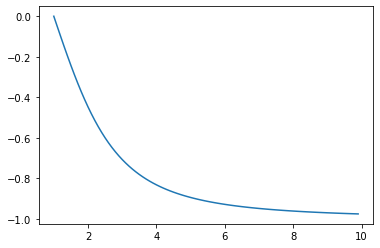

In [11]:
##For A
plt.plot(hl,EAl)

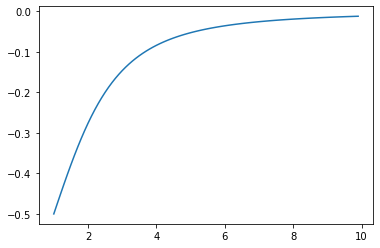

In [12]:
##For B
plt.plot(hl,EBl)
    
